# 1.3 -  Anwendungsbeispiel

<img style="float: right; margin:5px 0px 0px 10px" src="img/audio.jpg" width="400">


## Inhalt  

<table style="width:256px; border: 1px solid black; display: inline-block">
  <tr>
    <td  style="text-align:right" width=64px><img src="img/IMG-Python.png" style="float:left"></td>
      <td style="text-align:left" width=256px>
          <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#intro'>1. Audiosignale in Python</a>
    </td>
  </tr>  
    <tr>
    <td  style="text-align:right" width=64px><img src="img/IMG-fir.jpg" style="float:left"></td>
      <td style="text-align:left" width=256px>
          <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#fir'>2. FIR-Filterung</a>
    </td>
  </tr>  
    <tr>
    <td  style="text-align:right" width=64px><img src="img/IMG-iir.jpg" style="float:left"></td>
      <td style="text-align:left" width=256px>
          <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#iir'>3. IIR-Filterung</a>
    </td>
  </tr>
</table>



---- 

Diese Notebook baut auf die beiden Vorherigen auf, in denen der FIR und IIR Filterentwurf mit verschiedenen Methoden ausführlich behandelt wurde.

Im Folgenden soll ein Praxisbeispiel für einer Filterantwendung mit konkreten Randbedingungen bearbeitet werden. Auf ein Audiosignal (akustik.wav, zu finden im Ordner 'data') sollen zunächst Störsignale aufaddiert werden, die anschließend mit verschiedenen Filtern wieder entfernt werden, um das ursprüngliche Signal wiederherzustellen. Dabei sollen die Vor- und Nachteile der verschiedenen Filtertypen aufgezeigt werden.

Außerdem sollen einige grundlegende Python Module zur Verarbeitung speziell von Audiosignalen vorgestellt und angewendet werden.

<a id='intro'></a><div><img src="img/IMG-Python.png" style="float:left"><h2 style="position: relative; top: 6px; left: 6px">1. Audiosignale in Python</h2></div>

#### 1.1 Import von Audiodateien

Um ein Audiosignal zu bearbeiten, muss es zunächst geladen/importiert werden. Dafür werden drei verschiedene Methoden vorgestellt:

```python
path = 'data/akustik.wav'

# 1. wavfile:
from scipy.io import wavfile
sr, audio = wavfile.read(path)

# 2. wave:
import wave
wf = wave.open(path,'rb')
audio = wf.readframes(1024)

# 3. librosa:
import librosa
audio, sr = librosa.load(path)
```

In diesem Notebook verwenden wir die erste Option [`wavfile()`](https://docs.scipy.org/doc/scipy/reference/io.html?highlight=wavfile#module-scipy.io.wavfile), da es schon in dem Modul `scipy` integriert und somit installiert ist. Schauen Sie sich nun die Audioaufnahme `data/akustik.wav` im Zeit- und Frequenzbereich an. Importieren Sie dafür zuerst die dafür notwendigen Module:

In [1]:
# Importieren Sie aus scipy die Teilbibliothek "fftpack" 
# Importieren Sie aus  scipy.io die Teilbibliothek "wavfile"
# Importieren Sie aus matplotlib die Teilbibliothek "pyplot" mit dem Alias "plt"
# Importieren Sie das numpy-Modul mit dem Alias "np"

[..]
[..]
[..]
[..]

SyntaxError: invalid syntax (<ipython-input-1-63921d338a36>, line 6)

In [2]:
# Lösung
# Importieren Sie aus scipy die Teilbibliothek "fftpack"
# Importieren Sie aus  scipy.io die Teilbibliothek "wavfile"
# Importieren Sie aus matplotlib die Teilbibliothek "pyplot" mit dem Alias "plt"
# Importieren Sie das numpy-Modul mit dem Alias "np"

import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.io import wavfile

In [3]:
'''
Beispiel: Audiodatei einlesen und visualisieren
'''

# Datei einlesen 
sr, audio = [..]  # ToDo: Lesen Sie Sample Rate und das Audiosignal ein 
audio = audio/np.max(np.abs(audio))   # Normalisierung des Signals

# Initiale Daten
fs_Hz = sr  # Abtrastfrequenz
L = len(audio)  # Länge des Audiosignals
T = L/fs_Hz - 1/fs_Hz  # Zeit
t = np.linspace(0, T, L)  # Zeitbereich
f_Hz = np.linspace(0, fs_Hz/2, int(L/2))  # Frequenzbereich

# Spectrale
audio_fft = [..]   # ToDo: Führen Sie eine FFT des Audiosignals durch


# plot
plt.subplot(121)
plt.title('Audiosignal im Zeitbereich')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, audio)

plt.subplot(122)
plt.title('Audiosignal im Frequenzbereich')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(audio_fft[:int(L/2)]))

plt.gcf().set_size_inches(15, 5)
plt.show()

SyntaxError: invalid syntax (<ipython-input-3-b2b832b2bccd>, line 6)

In [ ]:

'''
Beispiel: Audiodatei einlesen und visualisieren
'''

# Datei einlesen 
fs_Hz, audioSignal = wavfile.read('data/akustik.wav')  # Sample Rate, Audiosignal im Array-Form
audioSignal = audioSignal/np.max(np.abs(audioSignal))   # Normalisierung

# Signalparameter:
signalLength = len(audio)                       # Länge des Audiosignals
T_s = signalLength/fs_Hz - 1/fs_Hz              # Zeit
t_s = np.linspace(0, T_s, signalLength)         # Zeitbereich
f_Hz = np.linspace(0, fs_Hz/2, signalLength//2) # Frequenzbereich

# Spectrale
audioSignal_fft = fftpack.fft(audioSignal)

# plot
plt.subplot(121)
plt.title('Audiosignal im Zeitbereich')
plt.xlabel('Zeit [s]') 
plt.ylabel('Signalamplitude') 
plt.plot(t_s, audioSignal)
plt.subplot(122)
plt.title('%d Punkte FFT des Audiosignals' %signalLength)
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('|X(f)|') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(audioSignal_fft[:int(L/2)]))
plt.gcf().set_size_inches(15, 5)
plt.show()

#### 1.2 Abspielen von Audiodateien

Die Ausgabe von Audiosignalen kann in Python auch mit unterschiedlichen externen Modulen realisiert werden. Falls Sie das Modul nicht installiert haben, können Sie dies via `pip install "module"` durchführen. Hier werden Ihnen drei mögliche Module mit Ihren individuellen Vorzügen vorgestellt:  

- [`playsound`](https://pypi.org/project/playsound/)   
Das PlaySound-Modul ist ein plattformübergreifendes Modul, das Audiodateien abspielen kann.

In [ ]:
from playsound import playsound

In [4]:
playsound('data/akustik.wav')

NameError: name 'playsound' is not defined

- [`IPython.display`](https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html)  
Mit diesem Modul wird die Audiodatei mit einem Audioplayer geöffnet, der anschließend per Klick gestartet werden kann:

In [5]:
import IPython.display as ipd

In [6]:
ipd.Audio('data/akustik.wav')

- [`simpleaudio`](https://simpleaudio.readthedocs.io/en/latest/)  
Das Modul ermöglicht es, sowohl wav-Dateien als auch NumPy-Arrays abgespielt zu können. Diese Eigenschaft ist für dieses Notebook sehr nützlich, weshalb im Weiteren auf `simpleaudio` zurückgegriffen wird.

In [7]:
import simpleaudio as sa

In [8]:
# Beispiel: wav-Dateien abspielen

# Datei einlesen
wave_obj = sa.WaveObject.from_wave_file('data/akustik.wav')

# abspielen
play_obj = wave_obj.play()
play_obj.wait_done()

In [9]:
# Beispiel: NumPy-Arrays (Audiosignal) abspielen

# Datei ablesen 
fs_Hz, audioSignal = wavfile.read('data/akustik.wav')

# abspielen
play_obj = sa.play_buffer(audioSignal, 1, 2, fs_Hz)
play_obj.wait_done()

In [10]:
# Beispiel: NumPy-Arrays (Sinussignal) abspielen

# Sinussignal erzeugen
t_s = np.linspace(0, 3, 8000)
sine = np.sin(440 * np.pi * t_s)

# Werte im 16-Bit-Bereich konvertieren
sound = sine * (2**15 - 1) / np.max(sine)
sound = sound.astype(np.int16)

# abspielen
play_obj = sa.play_buffer(sound, 1, 2, 8000)
play_obj.wait_done()

#### 1.3 Signale bearbeiten / Störsignal erstellen

Wenn das Audiosignal als numpy-Array vorliegt, kann das Signal sehr leicht bearbeitet werden. Zuerst soll dafür auf die Audiodatei `akustik.wav` ein Sinus mit der Frequenz von 440 Hz addiert werden. Dadurch erhält die Audiodatei ein Störsignal, welches Sie danach wieder davon zu entfernen versuchen. Da gleich das Signal zudem gefenstert werden soll, wird noch das Modul `signal` importiert, um daraus [get_window()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html) zu verwenden.

In [ ]:
# Lösung
# Importieren Sie aus scipy die Teilbibliothek "signal" 
[..]

In [ ]:
# Importieren Sie aus scipy die Teilbibliothek "signal" 
from scipy import signal

In [ ]:
'''
Beispiel: Signal addieren, visualisieren und abspielen
'''

# Datei einlesen (originales Audiosignal)
[..]   # ToDo: lesen sie die Audiodatei "akustik.wav" mit dem Objekt wavfile.read() ein
[..]   # ToDo: Normalisieren Sie das numpy-Array

# Initialisierung der Variablen
fs_Hz = [..]     # ToDo: Bestimmen Sie die Abtastfrequenz
fsin_Hz = [..]   # ToDo: Bestimmen Sie die Sinusfrequenz
L = [..]         # ToDo: Bestimmen Sie die Länge des Audio-Arrays
T = [..]         # ToDo: Bestimmen Sie die Zeitdauer der Aufnahme
t = [..]         # ToDo: Erzeugen Sie das zeitliche Array (nutzen Sie dafür np.linspace())
f_Hz = [..]      # ToDo: Erzeugen Sie das Array für den Frequenzbereich (nutzen Sie dafür np.linspace())

# Sinussignale erstellen
sine = [..]      # ToDo: Erzeugen Sie das Sinussignal mit einer Frequenz von 440 Hz im Zeitbereich
sine_fft = [..]  # ToDo: Berechnen Sie mittels FFT den Frequenzbereich des Signals

# Graphische Darstellung
plt.subplot(211)
plt.title('Störsignal im Zeitbereich')
plt.xlabel('Zeit [s]') 
plt.xlim(0, 0.1)
plt.ylabel('Amplitude') 
plt.ylim(-1, 1)
plt.plot(t, sine)

plt.subplot(222)
plt.title('Störsignal im Frequenzbereich')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 500)
plt.plot(f_Hz, np.abs(sine_fft[:int(L/2)]))

plt.gcf().set_size_inches(15, 5)
plt.show()

In [ ]:
# Abspielen des Sinussignals
sound = [..]    # ToDo: Konvertieren sie das Audio-Array "sine" in 16-Bit-Format (INT16) 
play_obj = [..] # ToDo: Abspielen von sound
play_obj.wait_done()

In [ ]:
# Erzeugung eines mit Sinus gestörten Audiosignals
s = [..]         # ToDo: Addieren Sie das Audiosignal mit dem Sinussignal (im Zeitbereich)
S = [..]         # ToDo: Berechnen Sie mittels FFT den Frequenzbereich des Signals mit Störung


plt.subplot(211)
plt.title('Audiosignal mit Störung im Zeitbereich')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, s)

plt.subplot(222)
plt.title('Audiosignal mit Störung im Frequenzbereich')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 500)
plt.plot(f_Hz, np.abs(S[:int(L/2)]))

plt.gcf().set_size_inches(15, 5)
plt.show()


In [ ]:
# Abspielen des gestörten Signals
sound = [..]    # ToDo: Konvertieren sie das Audio-Array "s" in 16-Bit-Format (INT16) 
play_obj = [..] # ToDo: Abspielen von sound
play_obj.wait_done()

In [ ]:
# Fensterung (optional)
wd = [..]          # ToDo: Erzeugen Sie ein Hanning-Fenster der Länge "L" mit signal.get_window()
s_windowed = [..]  # ToDo: Wenden Sie das Fenster auf das Signal "s" an.
S_windowed = [..]  # ToDo: Berechnen Sie mittels FFT den Frequenzbereich von s_windowed

plt.subplot(211)
plt.title('Audiosignal mit Störung im Zeitbereich')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, s_windowed)

plt.subplot(222)
plt.title('Audiosignal mit Störung im Frequenzbereich')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 500)
plt.plot(f_Hz, np.abs(S_windowed[:int(L/2)]))

plt.gcf().set_size_inches(15, 5)
plt.show()

In [ ]:
# Abspielen des gefensterten Störsignals
sound = [..]    # ToDo: Konvertieren sie das Audio-Array "s_windowed" in 16-Bit-Format (INT16) 
play_obj = [..] # ToDo: Abspielen von sound
play_obj.wait_done()

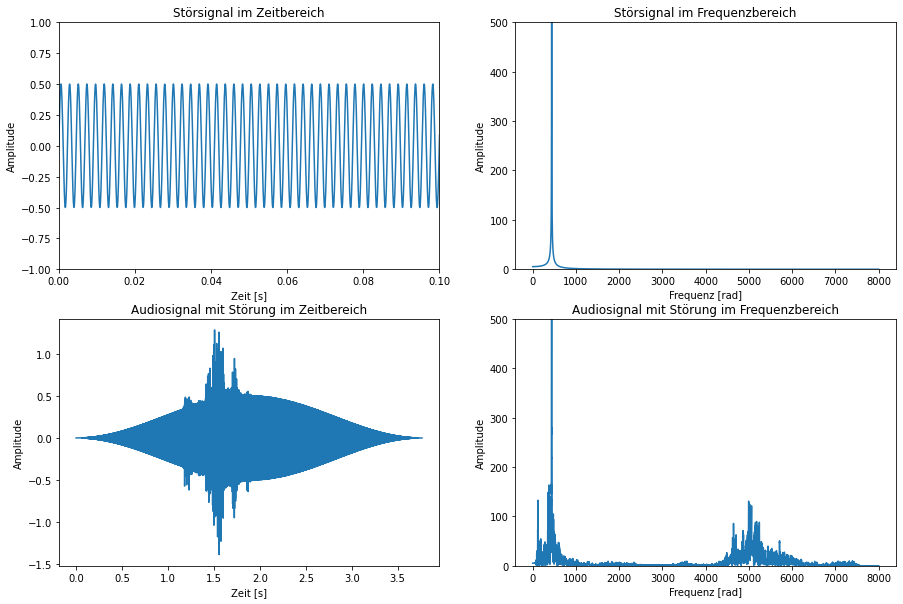

In [30]:
# Lösung
'''
Beispiel: Signal addieren, visualisieren und abspielen
'''
from scipy import signal 

# Datei einlesen (originales Audiosignal) und Amplitude normalisieren:
fs_Hz, audioSignal = wavfile.read('data/akustik.wav')
audioSignal = audioSignal/np.max(np.abs(audioSignal)) 

# Initiale Daten
fsin_Hz = 440   # Sinusfrequenz
signalLength = len(audioSignal)  # Länge des Audiosignals
T_s = signalLength/fs_Hz - 1/fs_Hz    # Zeitraum
t_s = np.linspace(0, T_s, signalLength) # Zeitbereich
f_Hz = np.linspace(0, fs_Hz/2, signalLength//2) # Frequenzbereich

# Sinussignale erstellen
sine = 1/2 * np.sin(fsin_Hz * 2*np.pi * t_s)
sine_fft = fftpack.fft(sine)

# Signal zur Filterung
corruptedAudioSignal = audioSignal + sine  # Additives Signal
corruptedAudioSignal_fft = fftpack.fft(corruptedAudioSignal)  # Frequenzgang

# Fensterung (optional)
window = signal.get_window('hanning', signalLength)
corruptedAudioSignal_windowed = corruptedAudioSignal * window

# plot
plt.subplot(221)
plt.title('Störsignal im Zeitbereich')
plt.xlabel('Zeit [s]') 
plt.xlim(0, 0.1)
plt.ylabel('Amplitude') 
plt.ylim(-1, 1)
plt.plot(t_s, sine)
plt.subplot(222)
plt.title('Störsignal im Frequenzbereich')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 500)
plt.plot(f_Hz, np.abs(sine_fft[:signalLength//2]))
plt.subplot(223)
plt.title('Audiosignal mit Störung im Zeitbereich')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t_s, corruptedAudioSignal_windowed)
plt.subplot(224)
plt.title('Audiosignal mit Störung im Frequenzbereich')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 500)
plt.plot(f_Hz, np.abs(corruptedAudioSignal_fft[:signalLength//2]))
plt.gcf().set_size_inches(15, 10)
plt.show()

In [31]:
# Lösung
# Abspielen
sound = (corruptedAudioSignal * (2**15 - 1) / np.max(np.abs(corruptedAudioSignal))).astype(np.int16)
play_obj = sa.play_buffer(sound, 1, 2, fs_Hz)
play_obj.wait_done()

In [32]:
# Lösung
# Abspielen
sound = (corruptedAudioSignal_windowed * (2**15 - 1) / np.max(np.abs(corruptedAudioSignal_windowed))).astype(np.int16)
play_obj = sa.play_buffer(sound, 1, 2, fs_Hz)
play_obj.wait_done()

Mit `corruptedAudioSignal` beziehungsweise `corruptedAudioSignal_windowed` wurde jetzt ein mit einem Sinuston gestörtes Audiosignal erzeugt. Im Folgenden wird nun versucht, mittels der in Notebook 1.1 und 1.2 kennengelernten Filter diese Störung zu filtern und wieder ein dem Original ähnliches Audiosignal zu rekonstruieren.

----

<a id='fir'></a><div><img src="img/IMG-fir.jpg" style="float:left"><h2 style="position: relative; top: 6px; left: 6px">2. FIR-Filterung </h2></div>

#### 2.1 FIR-Filter mittels IDFT

Wie in Kapitel 1.1 wird zuerst ein Bandsperrfilter mittels IDFT verwendet und entworfen, um das Sinussignal aus dem Audiosignal zu entfernen. Der Filter soll dabei eine Bandbreite von 30 Hz haben.

In [ ]:
'''
Beispiel: Entfernen von Signalen mittels selbst definierten FIR-Bandsperrfilter
'''

# Filter
bw = 30  # Bandbreite
H = [..]         # ToDo: Erzeugen Sie mit np.where einen idealen Bandsperrfilter mit Bandbreite 30 Hz
h = [..]         # ToDo: Berechnen Sie die Impulsantwort mittels ifft (ifft-shift nicht vergessen!)

# Filterung
s_filtered = [..] # ToDo: Falten Sie das gestörte Signal "s" (oder "s_windowed") mit dem Filter "h" 
S_filtered = [..] # ToDo: Berechnen Sie den Frequenzgang von s_filtered mittels FFT

# Plot
plt.subplot(221)
plt.title('Impulsantwort des Filters')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, np.real(h))
plt.subplot(222)
plt.title('Spectrale des Bandsperrfilters')
plt.xlabel('Frequenz [rad]') 
#plt.xlim(0, 1000)
plt.ylabel('Amplitude') 
plt.plot(f_Hz, H)
plt.subplot(223)
plt.title('Audiosignal nach Bandsperrfilterung')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, np.real(s_filtered))
plt.subplot(224)
plt.title('Frequenzgang nach Filterung')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(S_filtered[:int(L/2)]))
plt.gcf().set_size_inches(15, 10)
plt.show()



In [ ]:
# Abspielen des mit FIR-gefilterten Signals
sound = [..]    # ToDo: Konvertieren sie das Audiosignal in 16-Bit-Format (INT16) 
play_obj = [..] # ToDo: Abspielen von sound
play_obj.wait_done()

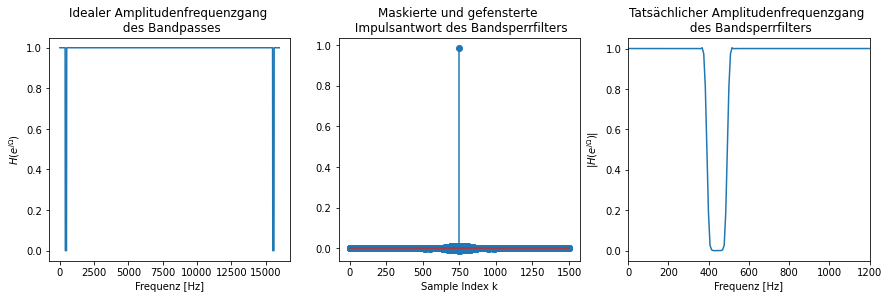

In [47]:
# Lösung

'''
Beispiel: Entfernen von Signalen mittels selbst definierten FIR-Bandsperrfilters 
'''
from scipy import integrate, fft, signal

# Berechnung des FIR Filters:
# 
bw_Hz = 100  # Bandbreite des Sperrbereiches
fcLower_Hz = fsin_Hz - bw_Hz/2
fcUpper_Hz = fsin_Hz + bw_Hz/2
fftLength = 2048
f_Hz = np.linspace(0, fs_Hz, fftLength)
# Definition des idealen Frequenzganges:
H = np.where((f_Hz > fcLower_Hz) & (f_Hz < fcUpper_Hz) 
             | (f_Hz > fs_Hz - fcUpper_Hz) & (f_Hz < fs_Hz - fcLower_Hz), 0, 1)  
# IFFT und shift:
h = np.fft.ifftshift(fftpack.ifft(H, fftLength))  

# Filterkern aus der Impulsantwort ausschneiden und Fenstern:
filterLength = 1500;
window = signal.get_window('hanning', filterLength+1)
filterKernel = np.real(h[(fftLength - filterLength)//2:(fftLength + filterLength)//2 + 1])*window
k = np.arange(0, filterKernel.size)

# Synthese des ist-Filters:
H_ist = np.abs(fft.fft(filterKernel, fftLength))

# Plot
plt.subplot(131)
plt.title('Idealer Amplitudenfrequenzgang \n des Bandpasses')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('$H(e^{j\Omega})$')
# plt.xlim([-700,700])
plt.plot(f_Hz, H)
plt.subplot(132)
plt.title('Maskierte und gefensterte \n Impulsantwort des Bandsperrfilters')
plt.xlabel('Sample Index k') 
plt.stem(k, filterKernel, use_line_collection=True)
plt.subplot(133)
plt.title('Tatsächlicher Amplitudenfrequenzgang \n des Bandsperrfilters')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('$|H(e^{j\Omega})|$') 
plt.plot(f_Hz, H_ist)
plt.xlim([0,1200])
plt.subplots_adjust(left=0.1, right=2, top=0.9)

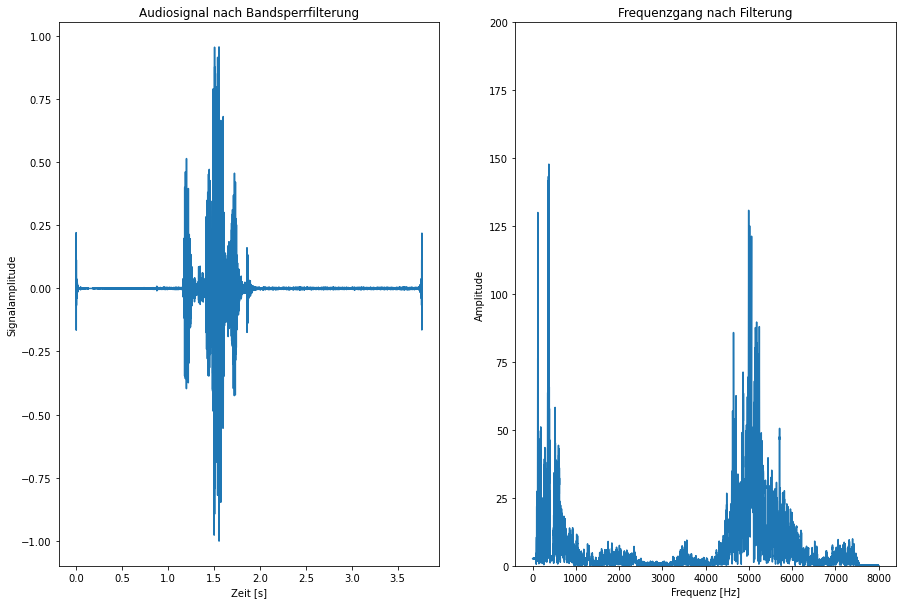

In [55]:
# Filterung
corruptedAudioSignal_filtered = signal.convolve(corruptedAudioSignal, filterKernel, 'same') # Faltung
corruptedAudioSignal_filtered_fft = fftpack.fft(corruptedAudioSignal_filtered)

# Plot
fPlot_Hz = np.linspace(0, fs_Hz, signalLength)
plt.subplot(121)
plt.title('Audiosignal nach Bandsperrfilterung')
plt.xlabel('Zeit [s]') 
plt.ylabel('Signalamplitude') 
plt.plot(t_s, corruptedAudioSignal_filtered)
plt.subplot(122)
plt.title('Frequenzgang nach Filterung')
plt.xlabel('Frequenz [Hz]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(fPlot_Hz[:signalLength//2], np.abs(corruptedAudioSignal_filtered_fft[:signalLength//2]))
plt.gcf().set_size_inches(15, 10)
plt.show()

# Abspielen
sound = (corruptedAudioSignal_filtered * (2**15 - 1) / np.max(np.abs(corruptedAudioSignal_filtered))).astype(np.int16)
play_obj = sa.play_buffer(sound, 1, 2, fs_Hz)
play_obj.wait_done()

#### 2.2 FIR-Filter mittels __firwin()__  
Für solche Anwendungen können wir aber auch die vorhandenen Filter wie [`signal.firwin()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) in __[`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html)__ direkt benutzen. Ändern Sie dabei die Ordnung (sie können dafür auch eine for-Schleife mit logarithmisch ansteigender Ordnungszahl implementieren), bis das Ergebnis dem der IDFT ähnelt. <br> _Hinweis_: die Ordnungszahl $n$ kann gerne größer 1000 sein.

In [ ]:
'''
Aufgabe: Entfernen von Frequenzen mittels signal.firwin() 
'''

# zu verwendende Parameter für firwin()
bw = 30  # Bandbreite
n = 5001  # Ordnung
wn = [(fsin_Hz-bw), (fsin_Hz+bw)]

# Filterung mit Fenster
h_fir = [..]       # ToDo: Erzeugen Sie mit signal.firwin() einen Bandsperrfilter.
H_fir = [..]       # ToDo: Berechnen Sie mittels FFT den Frequenzbereich des Bandpassfilters
s_filtered = [..]  # ToDo: Falten Sie das gestörte Signal "s" mit dem Filter "h_filtered" 
S_filtered = [..]  # ToDo: Berechnen Sie mittels FFT den Frequenzbereich des gefilterten Signals

# plot
plt.subplot(221)
plt.title('Impulsantwort des Filters')
plt.xlabel('Sample Nummer') 
plt.ylabel('Amplitude') 
plt.plot(h_fir)

plt.subplot(222)
plt.title('Spektral des Filters')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.plot(f_Hz, np.abs(H_fir[:int(L/2)]))

plt.subplot(223)
plt.title('Audiosignal nach Bandsperrfilterung')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, s_filtered)

plt.subplot(224)
plt.title('Frequenzgang nach Filterung')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(S_filtered[:int(L/2)]))
plt.gcf().set_size_inches(15, 10)
plt.show()

In [ ]:
# Abspielen des mit firwin() gefilterten Signals
sound = [..]    # ToDo: Konvertieren sie das Audiosignal in 16-Bit-Format (INT16) 
play_obj = [..] # ToDo: Abspielen von sound
play_obj.wait_done()

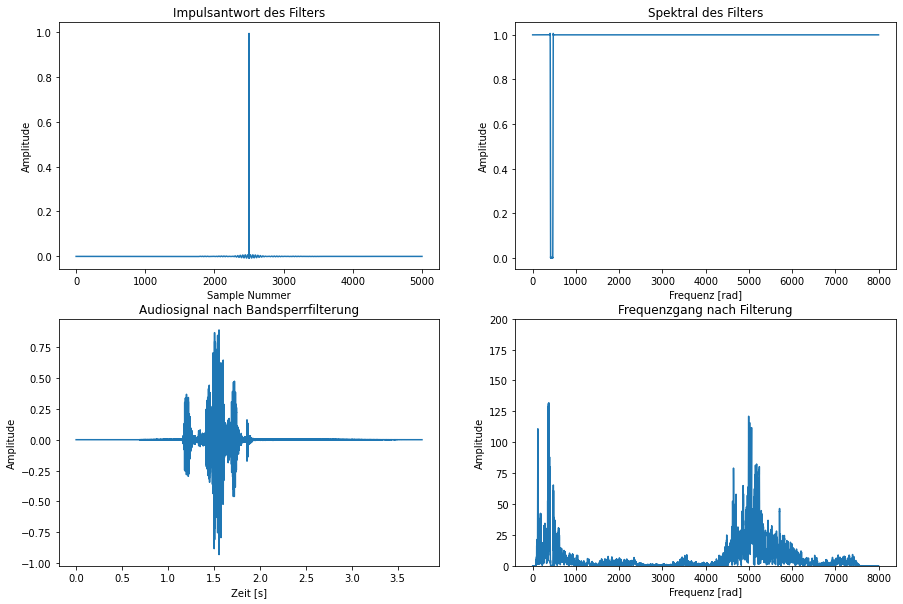

In [61]:
# Lösung

'''
Aufgabe: Entfernen von Signalen mittels signal.firwin() 
'''
# Parameter
bw_Hz = 30  # Bandbreite
filterOrder = 5001  # Ordnung
wPass_Hz = [(fsin_Hz-bw_Hz), (fsin_Hz+bw_Hz)]

# Filterung mit Fenster
h_fir = signal.firwin(filterOrder, wPass_Hz, window='hanning', fs=fs_Hz)
H_fir = fftpack.fft(h_fir, signalLength)  # Spektral des Filters
corruptedAudioSignal_filtered = signal.convolve(corruptedAudioSignal_windowed, h_fir, 'same')  # Faltung
corruptedAudioSignal_filtered_fft = fftpack.fft(corruptedAudioSignal_filtered)  # Spektral des Signals

# plot
fPlot_Hz
plt.subplot(221)
plt.title('Impulsantwort des Filters')
plt.xlabel('Sample Nummer') 
plt.ylabel('Amplitude') 
plt.plot(h_fir)
plt.subplot(222)
plt.title('Spektral des Filters')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.plot(fPlot_Hz[:signalLength//2], np.abs(H_fir[:signalLength//2]))
plt.subplot(223)
plt.title('Audiosignal nach Bandsperrfilterung')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t_s, corruptedAudioSignal_filtered)
plt.subplot(224)
plt.title('Frequenzgang nach Filterung')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(fPlot_Hz[:signalLength//2], np.abs(corruptedAudioSignal_filtered_fft[:signalLength//2]))
plt.gcf().set_size_inches(15, 10)
plt.show()

# Abspielen
sound = (corruptedAudioSignal_filtered * (2**15 - 1) / np.max(np.abs(corruptedAudioSignal_filtered))).astype(np.int16)
play_obj = sa.play_buffer(sound, 1, 2, fs_Hz)
play_obj.wait_done()

Um einen Bandsperrfilter mit hohem Knick und engem Frequenzbereich zu erzeugen, um nur das Sinussignal zu entfernen, benötigt der FIR-Filter eine große Ordnungszahl. Das bedeutet, dass man für die Umsetzung des Filters viel Speicherplatz benötigt und einen goßen Rechenaufwand hat, was für eine niedrige Effizienz spricht.  

Um zu analysieren, ob IIR-Filter eine bessere Alternative darstellen, wenn es um effizientes Filterdesign geht, soll nun im nächsten Kapitel dasselbe Signal `s` bzw. `s_windowes` mittels der in Notebook 1.2 kennengelernten Filter und Filterdesign bereinigt werden.

----

<a id='iir'></a><div><img src="img/IMG-iir.jpg" style="float:left"><h2 style="position: relative; top: 6px; left: 6px">3. IIR-Filterung </h2></div>

#### 3.1 Butterworth Filter

Zunächst soll ein Butterworth-Filter mit 10. Ordnung und einer Bandbreite $bw = 30$ Hz entworfen werden. Dazu wird, wie in Kapitel 1.2, das Objekt [`signal.butter()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) zur Erzeugung der Filterkoeffizienten verwendet. Geben Sie sich nun aber mittels `output=sos` die "second-order sections" aus, da mit diesen diekt über das Objekt [`signal.sosfilt()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sosfilt.html) eine Filterung des Signals durchgeführt werden kann.



In [ ]:
'''
Beispiel: Entfernen von Signalen mittels IIR-Bandsperrfilters (Butterworth)
'''
# Parameterinitialisierung
bw = [..]  # ToDo: Angabe der Bandbreite
n = [..]   # ToDo: Ordnung des IIR-Filters
wn = [..]  # ToDo: Frequenzbereich des Sperrbands

# Filterung 
sos =  [..]       # ToDo: Berechnung der "second-order sections" mittels signal.butter()
w, H_butt = [..]  # ToDo: Berechnung des Frequenzgangs mittels signal.sosfreqz()
s_filtered = [..] # ToDo: IIR-Filterung von "s_windowed" mittels signal.sosfilt()
S_filtered = [..] # ToDo: Berechnung des Frequenzgangs mittels FFT

# Graphische Darstellung
plt.subplot(311)
plt.title('Frequenzgang des Butterworth Filters mit Ordnung=%d' %n)
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.plot(f_Hz, np.abs(H_butt[:int(L/2)]))

plt.subplot(312)
plt.title('Audiosignal nach Filterung')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, s_filtered)

plt.subplot(313)
plt.title('Frequenzgang nach Filterung')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(S_filtered[:int(L/2)]))

plt.gcf().set_size_inches(8, 16)
plt.show()

In [ ]:
# Abspielen des Butterworth-gefilterten Signals (10. Ordnung)
sound = [..]    # ToDo: Konvertieren sie das Audiosignal in 16-Bit-Format (INT16) 
play_obj = [..] # ToDo: Abspielen von sound
play_obj.wait_done()

In [ ]:
# Lösung
'''
Beispiel: Entfernen von Signalen mittels IIR-Bandsperrfilters (Butterworth)
'''
# Parameter
bw = 30  # Bandbreite des Filters
n = 10  # Ordnung des IIR-Filters
wn = [fsin_Hz-bw, fsin_Hz+bw]  # Frequenzbereich des Sperrbands

# Filterung 
sos = signal.butter(n, wn, 'bs', analog=False, fs=fs_Hz, output='sos')
w, H_butt = signal.sosfreqz(sos, int(L/2), fs=fs_Hz)
s_filtered = signal.sosfilt(sos, s_windowed)
S_filtered = fftpack.fft(s_filtered)

# plot
plt.subplot(311)
plt.title('Frequenzgang des Butterworth Filters mit Ordnung=%d' %n)
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.plot(f_Hz, np.abs(H_butt[:int(L/2)]))
plt.subplot(312)
plt.title('Audiosignal nach Filterung')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, s_filtered)
plt.subplot(313)
plt.title('Frequenzgang nach Filterung')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(S_filtered[:int(L/2)]))
plt.gcf().set_size_inches(8, 16)
plt.show()

# Abspielen
sound = (s_filtered * (2**15 - 1) / np.max(np.abs(s_filtered))).astype(np.int16)
play_obj = sa.play_buffer(sound, 1, 2, fs_Hz)
play_obj.wait_done()

Um nun den Butterworth-Filter mit Spezifikationen zu erzeugen, soll nun der Filterentwurf mit Ordnungsselektion durchgeführt werden. Dazu wird das Objekt [signal.buttord()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.buttord.html) verwendet. Dessen Dämpfung soll im Sperrbereich von $fsin\_Hz-bw$ bis $fsin\_Hz+bw$ Hz mindestens 60 dB betragen, während die Dämpfung im Durchlassbereich (außerhalb von [$fsin\_Hz-bw-10, fsin\_Hz+bw+10$] Hz) innerhalb von -10 dB liegen soll.<br>
Die Bandbreite soll dabei wieder 30 Hz betragen.

In [ ]:
'''
Aufgabe: Entfernen von Signalen mittels IIR-Bandsperrfilters (Butterworth)
'''
# Ordnungsselektion
bw = [..]  # ToDo: Angabe der Bandbreite
n, wn = [..] # ToDo: Berechnung der Ordnungszahl und der Grenzfrequenzen mit signal.buttord() 

# Filterung 
sos = [..]       # ToDo: Berechnung der "second-order sections" mittels signal.butter()
w, H_butt = [..]  # ToDo: Berechnung des Frequenzgangs mittels signal.sosfreqz()
s_filtered = [..] # ToDo: IIR-Filterung von "s_windowed" mittels signal.sosfilt()
S_filtered = [..] # ToDo: Berechnung des Frequenzgangs mittels FFT

# Graphische Darstellung
plt.subplot(311)
plt.title('Frequenzgang des Butterworth Filters mit Ordnung=%d' %n)
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.plot(f_Hz, np.abs(H_butt[:int(L/2)]))
plt.subplot(312)
plt.title('Audiosignal nach Filterung')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, s_filtered)
plt.subplot(313)
plt.title('Frequenzgang nach Filterung')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(S_filtered[:int(L/2)]))
plt.gcf().set_size_inches(8, 16)
plt.show()

In [ ]:
# Abspielen des Butterworth-gefilterten Signals (Ordnungsselektion)
sound = [..]    # ToDo: Konvertieren sie das Audiosignal in 16-Bit-Format (INT16) 
play_obj = [..] # ToDo: Abspielen von sound
play_obj.wait_done()

In [ ]:
# Lösung
'''
Aufgabe: Entfernen von Signalen mittels IIR-Bandsperrfilters (Butterworth)
'''
# Ordnungselektion
bw = 30  # Bandbreite
n, wn = signal.buttord([fsin_Hz-bw-10, fsin_Hz+bw+10], [fsin_Hz-bw, fsin_Hz+bw], 10, 60, False, fs_Hz)

# Filterung 
sos = signal.butter(n, wn, 'bs', False, 'sos', fs_Hz)
w, H_butt = signal.sosfreqz(sos, int(L/2), fs=fs_Hz)
s_filtered = signal.sosfilt(sos, s_windowed)
S_filtered = fftpack.fft(s_filtered)

# plot
plt.subplot(311)
plt.title('Frequenzgang des Butterworth Filters mit Ordnung=%d' %n)
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.plot(f_Hz, np.abs(H_butt[:int(L/2)]))
plt.subplot(312)
plt.title('Audiosignal nach Filterung')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, s_filtered)
plt.subplot(313)
plt.title('Frequenzgang nach Filterung')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(S_filtered[:int(L/2)]))
plt.gcf().set_size_inches(8, 16)
plt.show()

# Abspielen
sound = (s_filtered * (2**15 - 1) / np.max(np.abs(s_filtered))).astype(np.int16)
play_obj = sa.play_buffer(sound, 1, 2, fs_Hz)
play_obj.wait_done()

Im Titel der ersten Graphik wird die Ordnungszahl ausgegeben. Diese ist um mindestens 2 Zehnerpotenzen geringer als die des FIR-Filters. Das bedeutet, dass man für die Umsetzung des IIR-Filters viel weniger Speicherplatz und Rechenleistung benötigt, was die Anwendung des IIR-Filters in diesem Fall viel effizienter macht. 

### 3.2 Chebyshev Filter

Entwerfen Sie zum Schluss noch einen Chebyshev-Filter vom Typ 2 zur Bereinigung des Audiosignals. Auch hier soll die Ordnungsselektion angewendet werden, wofür das Objekt [`signal.cheb2ord()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheb2ord.html) zur Verfügung steht.<br>
Die Bedingungen an den Filter sind wie in 3.1: Die Dämpfung soll im Sperrbereich von $fsin\_Hz-bw$ bis $fsin\_Hz+bw$ Hz mindestens 60 dB betragen, während die Dämpfung im Durchlassbereich (außerhalb von [$fsin\_Hz-bw-10, fsin\_Hz+bw+10$] Hz) innerhalb von -10 dB liegen soll.<br>
Die Bandbreite soll dabei wieder 30 Hz betragen.

Für die Berechnung des Filters soll nun aber das Objekt [`signal.cheby2()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby2.html) verwendet werden.

In [ ]:
'''
Aufgabe: Entfernen von Signalen mittels IIR-Bandsperrfilters (Chebyshev II mit Ordnungselektion)
'''



# Ordnungsselektion
bw = [..]  # ToDo: Angabe der Bandbreite
n, wn = [..] # ToDo: Berechnung der Ordnungszahl und der Grenzfrequenzen mit signal.cheb2ord() 

# Filterung 
sos = [..]       # ToDo: Berechnung der "second-order sections" mittels signal.cheby2()
w, H_butt = [..]  # ToDo: Berechnung des Frequenzgangs mittels signal.sosfreqz()
s_filtered = [..] # ToDo: IIR-Filterung von "s_windowed" mittels signal.sosfilt()
S_filtered = [..] # ToDo: Berechnung des Frequenzgangs mittels FFT


# Graphische Darstellung
plt.subplot(311)
plt.title('Frequenzgang des Chebyshev-II Filters mit Ordnung=%d' %n)
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.plot(f_Hz, np.abs(H_cheby[:int(L/2)]))

plt.subplot(312)
plt.title('Audiosignal nach Filterung')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, s_filtered)

plt.subplot(313)
plt.title('Frequenzgang nach Filterung')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(S_filtered[:int(L/2)]))

plt.gcf().set_size_inches(8, 16)
plt.show()

In [ ]:
# Abspielen des Chebyshev-gefilterten Signals (Ordnungsselektion)
sound = [..]    # ToDo: Konvertieren sie das Audiosignal in 16-Bit-Format (INT16) 
play_obj = [..] # ToDo: Abspielen von sound
play_obj.wait_done()

In [ ]:
# Lösung
'''
Aufgabe: Entfernen von Signalen mittels IIR-Bandsperrfilters (Chebyshev II mit Ordnungselektion)
'''

# Ordnungselektion
bw = 30  # Bandbreite
n, wn = signal.cheb2ord([fsin_Hz-bw-10, fsin_Hz+bw+10], [fsin_Hz-bw, fsin_Hz+bw], 10, 60, False, fs_Hz)

# Filterung
sos = signal.cheby2(n, 60, wn, 'bs', False, 'sos', fs_Hz)
w, H_cheby = signal.sosfreqz(sos, int(L/2), fs=fs_Hz)
s_filtered = signal.sosfilt(sos, s_windowed)
S_filtered = fftpack.fft(s_filtered)

# plot
plt.subplot(311)
plt.title('Frequenzgang des Chebyshev-II Filters mit Ordnung=%d' %n)
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.plot(f_Hz, np.abs(H_cheby[:int(L/2)]))
plt.subplot(312)
plt.title('Audiosignal nach Filterung')
plt.xlabel('Zeit [s]') 
plt.ylabel('Amplitude') 
plt.plot(t, s_filtered)
plt.subplot(313)
plt.title('Frequenzgang nach Filterung')
plt.xlabel('Frequenz [rad]') 
plt.ylabel('Amplitude') 
plt.ylim(0, 200)
plt.plot(f_Hz, np.abs(S_filtered[:int(L/2)]))
plt.gcf().set_size_inches(8, 16)
plt.show()

# Abspielen
sound = (s_filtered * (2**15 - 1) / np.max(np.abs(s_filtered))).astype(np.int16)
play_obj = sa.play_buffer(sound, 1, 2, fs_Hz)
play_obj.wait_done()

---

Zum Schluss soll nun das bearbeitete Audiosignal gespeichert werden. Dazu kann das Objekt [`wavfile.write()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html) verwendet werden.

In [ ]:
'''
Beispiel: Daten in eine wav-Datei schreiben
'''
# Pfad einer neuen wav-Datei bestimmen
file_path = 'data/akustik_filtered.wav'

# Audiodaten in 16-Bit-Format konvertieren
data = [..]  # ToDo: Konvertieren sie das Audiosignal in 16-Bit-Format (INT16) 

# Audiodaten schreiben
[..]         # ToDo: Speichern Sie das Audiosignal data in data_path mit fs_Hz-Frequenz ab.

# Testen, ob die Daten erfolgreich gespeichert wurde
[..]         # ToDo: Spielen Sie die gespeicherte Datei mit z.B. playsound() ab.

In [ ]:
# Lösung
'''
Beispiel: Daten in eine wav-Datei schreiben
'''
import numpy as np
from scipy.io import wavfile
from playsound import playsound

# Pfad einer neuen wav-Datei bestimmen
file_path = 'data/akustik_filtered.wav'
# Audiodaten in 16-Bit-Format konvertieren
data = (s_filtered * (2**15 - 1) / np.max(np.abs(s_filtered))).astype(np.int16)
# Audiodaten schreiben
wavfile.write(file_path, fs_Hz, data)

# Testen, ob die Daten erfolgreich gespeichert wurde
playsound('data/akustik_filtered.wav')

----

### References

1. Titelbild von [Encarni Mármol](https://lda-audiotech.com/en/2018/10/30/how-to-digitize-analog-audio/)  
2. [Play sound in Python](https://pythonbasics.org/python-play-sound/)